In [9]:
pip install --upgrade absl-py

Requirement already up-to-date: absl-py in /Users/cheryl/anaconda3/lib/python3.8/site-packages (0.10.0)
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

     |████████████████████████████████| 165.2 MB 129 kB/s eta 0:00:013     |███████████████████████████████▋| 163.2 MB 8.4 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 459 kB 11.7 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=60983184f5918722aa3bc84b3751f5e9c92acb01e58ecea7635b2ae53fdb67b8
  Stored in directory: /Users/cheryl/Library/Caches/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install imgaug

     |████████████████████████████████| 948 kB 672 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 52.3 MB 9.0 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


### Image Reconstruction

In [2]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

### Data Preparation

In [3]:
train = pd.read_csv("./data/fashion-mnist_train.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

### Create the Autoencoder Architecture

In [20]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [21]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 1500)              1177500   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

In [22]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 7s 304ms/step - loss: 0.0955 - val_loss: 0.0711
Epoch 2/20
24/24 [==============================] - 8s 336ms/step - loss: 0.0609 - val_loss: 0.0500
Epoch 3/20
24/24 [==============================] - 8s 331ms/step - loss: 0.0437 - val_loss: 0.0398
Epoch 4/20
24/24 [==============================] - 8s 325ms/step - loss: 0.0383 - val_loss: 0.0369
Epoch 5/20
24/24 [==============================] - 8s 314ms/step - loss: 0.0353 - val_loss: 0.0341
Epoch 6/20
24/24 [==============================] - 7s 305ms/step - loss: 0.0321 - val_loss: 0.0305
Epoch 7/20
24/24 [==============================] - 8s 319ms/step - loss: 0.0298 - val_loss: 0.0279
Epoch 8/20
24/24 [==============================] - 7s 307ms/step - loss: 0.0268 - val_loss: 0.0259
Epoch 9/20
24/24 [==============================] - 8s 340ms/step - loss: 0.0253 - val_loss: 0.0248
Epoch 10/20
24/24 [==============================] - 7s 308ms/step - loss: 0.0246 - val_loss: 0.0241

In [23]:
preds = model.predict(val_x)

#### Input Images:

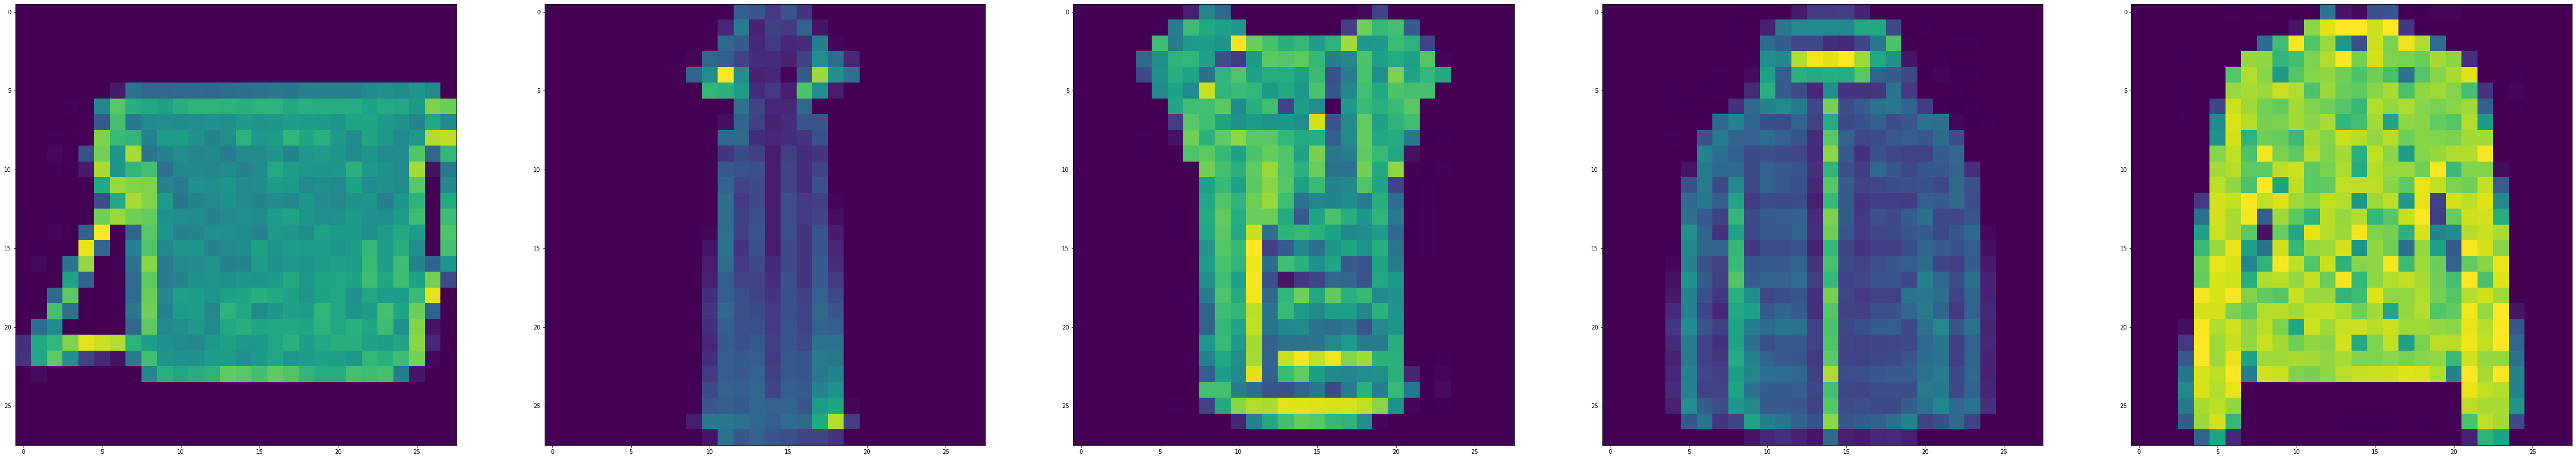

In [24]:
from PIL import Image 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

#### Predicted images:

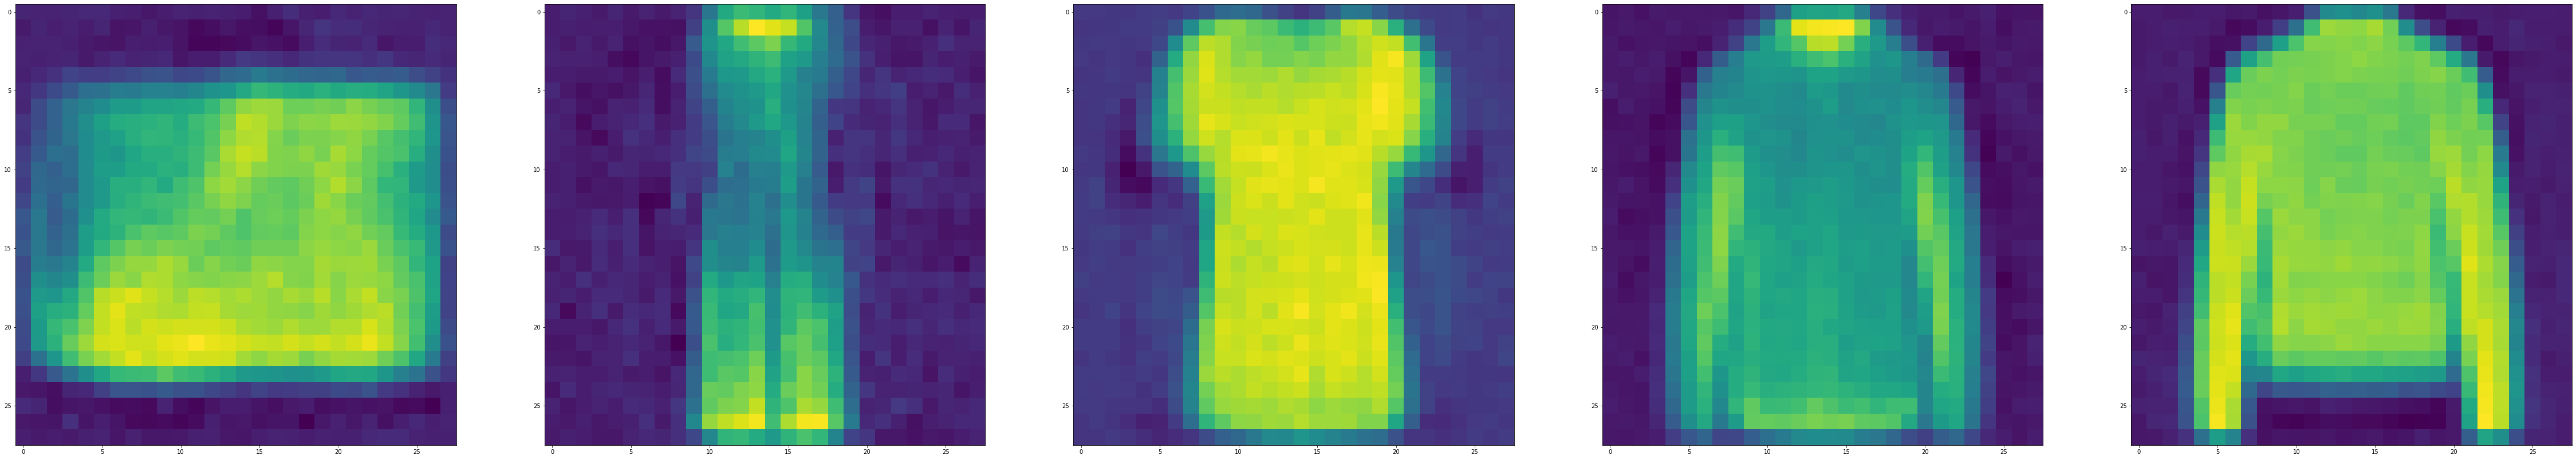

In [25]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()